# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

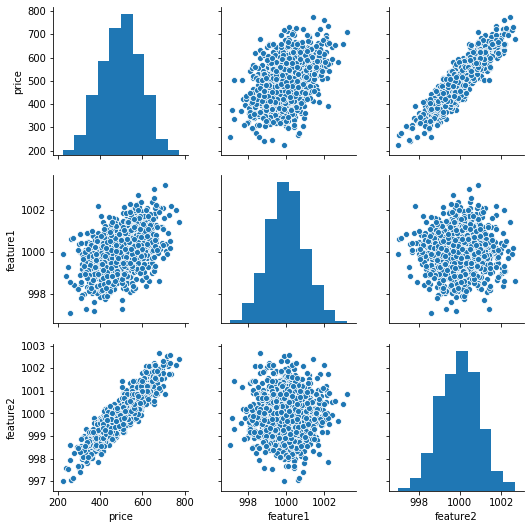

In [4]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [5]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('price', axis=1).values

In [16]:
y = df['price'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(700, 2)

In [19]:
X_test.shape

(300, 2)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# help(MinMaxScaler)

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
X_train[:10]

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       [1000.35516374, 1002.20349379],
       [1000.3522229 ,  999.18061663],
       [ 999.52058286, 1000.33504949],
       [ 999.85122461, 1000.82325733],
       [ 999.73506695,  999.71177054],
       [ 999.76489441, 1000.33095384],
       [1000.82489853, 1000.35581475]])

In [29]:
X_train = scaler.transform(X_train)

In [30]:
X_train[:10]

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       [0.52955895, 0.93551377],
       [0.52907398, 0.39249753],
       [0.39193092, 0.59987473],
       [0.44645598, 0.68757421],
       [0.4273008 , 0.48791166],
       [0.43221954, 0.599139  ],
       [0.60702139, 0.60360491]])

In [31]:
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# help(Dense)
# help(Sequential)

In [37]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [38]:
model.fit(x=X_train, y=y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 961us/sample - loss: 256675.4027
Epoch 2/250
700/700 [==============================] - 0s 232us/sample - loss: 256579.0227
Epoch 3/250
700/700 [==============================] - 0s 101us/sample - loss: 256481.2966
Epoch 4/250
700/700 [==============================] - 0s 62us/sample - loss: 256370.3079
Epoch 5/250
700/700 [==============================] - 0s 51us/sample - loss: 256245.6424
Epoch 6/250
700/700 [==============================] - 0s 99us/sample - loss: 256105.1897
Epoch 7/250
700/700 [==============================] - 0s 152us/sample - loss: 255949.1711
Epoch 8/250
700/700 [==============================] - 0s 118us/sample - loss: 255776.4446
Epoch 9/250
700/700 [==============================] - 0s 175us/sample - loss: 255584.7261
Epoch 10/250
700/700 [==============================] - 0s 207us/sample - loss: 255373.1384
Epoch 11/250
700/700 [==============================] - 0s 222us/sample

700/700 [==============================] - 0s 117us/sample - loss: 600.6433
Epoch 182/250
700/700 [==============================] - 0s 82us/sample - loss: 582.8307
Epoch 183/250
700/700 [==============================] - 0s 59us/sample - loss: 564.3054
Epoch 184/250
700/700 [==============================] - 0s 66us/sample - loss: 550.6063
Epoch 185/250
700/700 [==============================] - 0s 101us/sample - loss: 534.8218
Epoch 186/250
700/700 [==============================] - 0s 173us/sample - loss: 521.5669
Epoch 187/250
700/700 [==============================] - 0s 63us/sample - loss: 505.4129
Epoch 188/250
700/700 [==============================] - 0s 205us/sample - loss: 490.7343
Epoch 189/250
700/700 [==============================] - 0s 163us/sample - loss: 473.8551
Epoch 190/250
700/700 [==============================] - 0s 213us/sample - loss: 458.1995
Epoch 191/250
700/700 [==============================] - 0s 128us/sample - loss: 440.7201
Epoch 192/250
700/700 [=====

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [43]:
loss = model.history.history['loss']

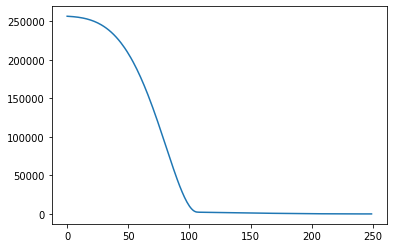

In [50]:
sns.lineplot(x=range(len(loss)), y=loss)

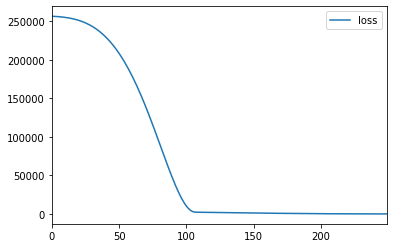

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [52]:
model.metrics_names

['loss']

In [53]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [54]:
training_score

25.323337260654995

In [55]:
test_score

26.531542002360027

### Further Evaluations

In [56]:
test_predictions = model.predict(X_test)

In [58]:
test_predictions[:10]

array([[406.75998],
       [622.48474],
       [591.2163 ],
       [572.2765 ],
       [369.51266],
       [578.7836 ],
       [516.2041 ],
       [459.57135],
       [549.5437 ],
       [448.04007]], dtype=float32)

In [60]:
y_test.shape

(300,)

In [63]:
test_predictions.shape

(300, 1)

In [64]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])
pred_df.head()

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [77]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [72]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [73]:
pred_df.columns = ['Test Y', 'Model Predictions']

In [75]:
pred_df.head()

,Test Y,Model Predictions
0,402.296319,406.759979
1,624.156198,622.484741
2,582.455066,591.216309
3,578.588606,572.276489
4,371.224104,369.512665


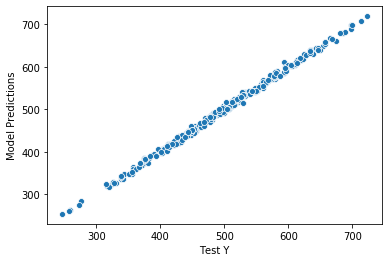

In [76]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

In [84]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
pred_df.head(2)

,Test Y,Model Predictions,Error
0,402.296319,406.759979,-4.463661
1,624.156198,622.484741,1.671457


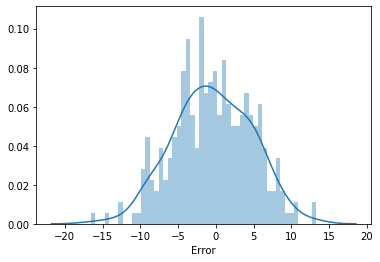

In [85]:
sns.distplot(pred_df['Error'], bins=50)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.186110597230464

In [91]:
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])

26.53154689221427

In [93]:
# Exactly the same with the test_score we saw before
test_score

26.531542002360027

In [94]:
#RMSE
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])**0.5

5.15087826416178

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [95]:
new_gem = [[998,1000]]

In [104]:
# Scale the feature
new_gem = scaler.transform(new_gem)

In [107]:
model.predict(new_gem)

array([[421.8996]], dtype=float32)

## Saving and Loading a Model

In [108]:
from tensorflow.keras.models import load_model

In [109]:
model.save('my_model.h5') # creates a HDF5 file

In [110]:
later_model = load_model('my_model.h5')

In [111]:
later_model.predict(new_gem)

array([[421.8996]], dtype=float32)